# Edge states

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

## Hamiltonian discretized for a ribbon

The BHZ Hamiltonian is

$$H = A(\sigma_x k_x - \sigma_y k_y) + (M-B k^2)\sigma_z$$

But now, we'll consider $k_x$ as an operator: $k_x = -i\partial_x$ and $k_x^2 = -\partial_x^2$. We'll use finite differences to cast these into matrix representations:

$$
k_x \approx -i \dfrac{1}{2\Delta x}
\begin{pmatrix}
 0 &  1 &  &  \\
-1 &  0 & 1 &  \\
   & -1 & 0 & 1 & \\
   &    & -1 & \ddots
\end{pmatrix}
$$

$$
k_x^2 \approx -\dfrac{1}{\Delta x^2}
\begin{pmatrix}
-2 &  1 &  &  \\
 1 & -2 &  1 &  \\
   &  1 & -2 & 1 & \\
   &    &  1 & \ddots
\end{pmatrix}
$$

# spin x momentum

Now the operators in $H$ have the form $\sigma_\mu \otimes k_x^\nu$, and we combine these using the direct product $\otimes =$ `np.kron(...)`.

This form tell us that our basis is set as:

$$\psi \sim \begin{pmatrix}
e_0 \\ e_1 \\ \vdots \\ e_{N-1}
h_0 \\ h_1 \\ \vdots \\ h_{N-1}
\end{pmatrix}$$

where $e_n$ is the coefficient of the wave-function at point $x_n$ for the electron-like component, and $h_n$ the equivalent for the hole-like component of the original BHZ model set in the basis $\{|E_1\rangle, |H_1\rangle\}$.

In [2]:
# The Pauli matrices
s0 = np.eye(2)
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])
sz = np.array([[1,0],[0,-1]])

L = 10
N = 101
x = np.linspace(-L/2, L/2, N)
dx = x[1]-x[0]

# identity, kx, and kx² as matrix operators
op_I  = np.eye(N)
op_k  = (-1j/(2*dx))*(-np.eye(N, k=-1) + np.eye(N, k=+1))
op_k2 = (-1/(dx**2))*(np.eye(N, k=-1) - 2*np.eye(N) + np.eye(N, k=+1))

# BHZ H for a given ky, with kx discretize with size L and N points
def BHZ_Ribbon(ky=0, m=1, a=1, b=-0.1):
    h  = a * (np.kron(sx, op_k) + np.kron(sy, op_I)*ky)
    h += m * np.kron(sz, op_I)
    h += -b * np.kron(sz, op_k2 + op_I*ky**2)
    return h

## Bands: the eigenvalues

In [3]:
nk = 51 # number of points and range for ky
ks = np.linspace(-5, 5, nk)

a=0.1
ms = np.array([1, 0.5, 0, -0.5, -1])

# bands for the ribbon as a function of ky for each m
bands = {}
for m in ms:
    bands[m] = np.array([np.linalg.eigvalsh(BHZ_Ribbon(ky, m, a)) for ky in ks])

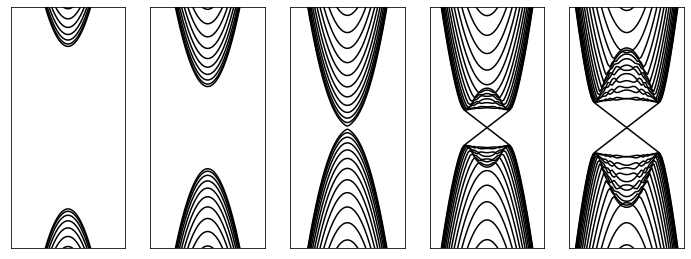

In [4]:
plt.figure(figsize=(10,4))
spt = 150
for m in ms:
    spt += 1
    plt.subplot(spt)
    plt.plot(ks, bands[m], c='black')
    plt.xticks([])
    plt.yticks([])
    plt.ylim(-1.5, 1.5)
    
plt.tight_layout()
plt.show()

## The edge states

Index of first band with E>0:  101


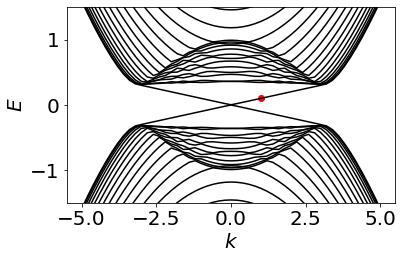

In [9]:
k0 = 1 # select one ky point to get its eigenstate
eks, psi = np.linalg.eigh(BHZ_Ribbon(k0, m=-1, a=a))

# get the index for the first band with E>0
id0 = np.argwhere(eks>0)[0][0]
print('Index of first band with E>0: ', id0)

# plot the bands and mark the selected state in red
plt.plot(ks, bands[-1], c='black')
plt.scatter([k0], [eks[id0]], c='red')
plt.ylim(-1.5, 1.5)
plt.xlabel(r'$k$')
plt.ylabel(r'$E$')
plt.tight_layout()
plt.show()

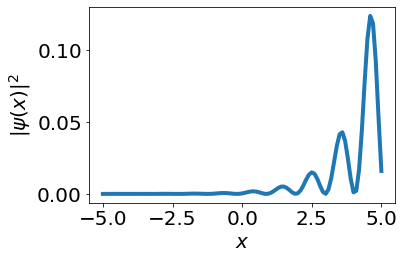

In [11]:
# calculate the density |psi|^2
# the first  half of psi is the electron-like component vs x
# the second half of psi is the     hole-like component vs x
# the density is the sum of the squares of each component
elike_psi = psi[:N, id0]
hlike_psi = psi[N:, id0]
dens = np.abs(elike_psi)**2 + np.abs(hlike_psi)**2

plt.plot(x, dens, lw=4)
plt.xlabel(r'$x$')
plt.ylabel(r'$|\psi(x)|^2$')
plt.tight_layout()
plt.show()

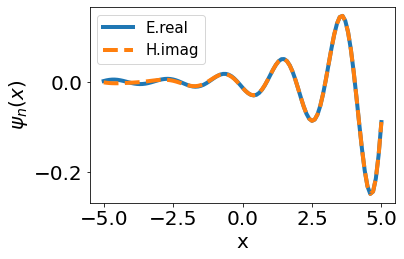

In [7]:
# plot the finite real and imag components

plt.plot(x, elike_psi.real, c='C0', ls='-', lw=4, label='E.real')
#plt.plot(x, elike_psi.imag, c='C0', ls='--', lw=4, label='E.imag')
#plt.plot(x, hlike_psi.real, c='C1', ls='-', lw=4, label='H.real')
plt.plot(x, hlike_psi.imag, c='C1', ls='--', lw=4, label='H.imag')
plt.xlabel('x')
plt.ylabel('$\psi_n(x)$')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()